In [ ]:
from google.colab import drive

#mount drive
drive.mount('/content/drive')
#locate the file in google drive
path = '/drive/My Drive/dataset_gatos_perros_gorilas'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#show numbers image every class
!ls /content/drive/MyDrive/dataset_gatos_perros_gorilas/gato// | wc -l
!ls /content/drive/MyDrive/dataset_gatos_perros_gorilas/gorila// | wc -l
!ls /content/drive/MyDrive/dataset_gatos_perros_gorilas/perro/ | wc -l

1467
164
1558


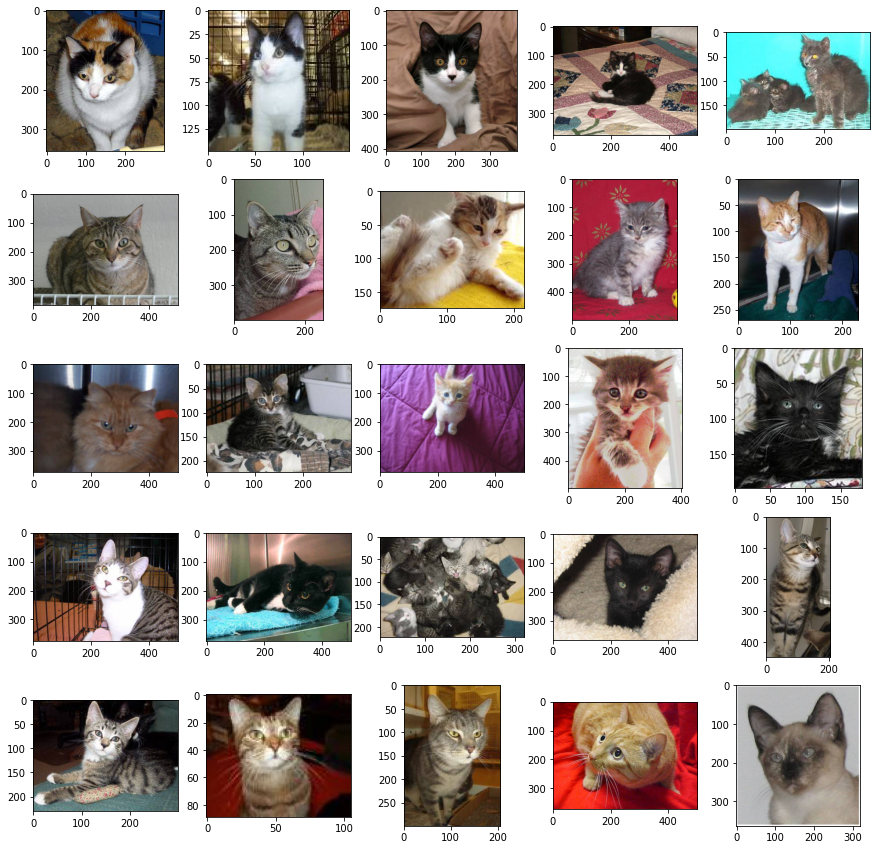

In [ ]:
#show some image from folder
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
gatos = '/content/drive/MyDrive/dataset_gatos_perros_gorilas/gato/'
imgs = os.listdir(gatos)

for i, nameimg in enumerate(imgs[:25]):
  plt.subplot(5,5,i+1)
  img = mpimg.imread(gatos + '/' + nameimg)
  plt.imshow(img)

Found 2552 images belonging to 3 classes.
Found 636 images belonging to 3 classes.


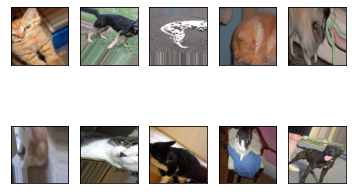

In [ ]:
#data augmentations with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#create data generator
datagen = ImageDataGenerator(
    rescale = 1. /255, #val between 0 and 1, not between 0 and 255
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split = 0.2 #20% for data test
)

#generators for training and validation data
datagen_training = datagen.flow_from_directory('/content/drive/MyDrive/dataset_gatos_perros_gorilas/', 
                                               target_size = (224,224), batch_size = 32,
                                               shuffle = True, subset = 'training'
                                               )
datagen_validation = datagen.flow_from_directory('/content/drive/MyDrive/dataset_gatos_perros_gorilas/', 
                                               target_size = (224,224), batch_size = 32,
                                               shuffle = True, subset = 'validation'
                                               )
#print 10 image from training subset
for image, label in datagen_training:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
modelo = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax') # 3 clases
])
modelo.build([None, 224, 224, 3])  # Batch input shape.
modelo.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
modelo.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#training model with generators of training and validations
EPOCHS = 50
historial = modelo.fit(
    datagen_training, epochs = EPOCHS, batch_size = 32,
    validation_data = datagen_validation
)

Epoch 1/50
80/80 [==============================] - 621s 8s/step - loss: 0.8564 - accuracy: 0.4855 - val_loss: 0.7958 - val_accuracy: 0.5425
Epoch 2/50
80/80 [==============================] - 48s 599ms/step - loss: 0.8050 - accuracy: 0.5451 - val_loss: 0.8257 - val_accuracy: 0.5692
Epoch 3/50
80/80 [==============================] - 48s 599ms/step - loss: 0.7840 - accuracy: 0.5435 - val_loss: 0.7858 - val_accuracy: 0.5597
Epoch 4/50
80/80 [==============================] - 48s 598ms/step - loss: 0.7507 - accuracy: 0.5831 - val_loss: 0.7585 - val_accuracy: 0.5770
Epoch 5/50
80/80 [==============================] - 49s 607ms/step - loss: 0.7535 - accuracy: 0.5937 - val_loss: 0.7434 - val_accuracy: 0.6226
Epoch 6/50
80/80 [==============================] - 47s 592ms/step - loss: 0.7459 - accuracy: 0.5944 - val_loss: 0.7527 - val_accuracy: 0.5739
Epoch 7/50
80/80 [==============================] - 48s 600ms/step - loss: 0.7420 - accuracy: 0.5984 - val_loss: 0.7344 - val_accuracy: 0.6006
E

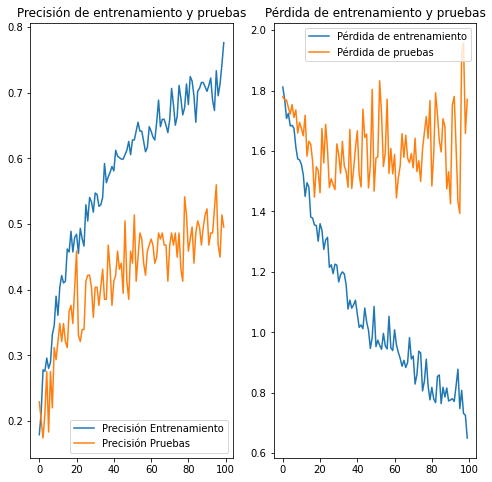

In [ ]:
#precision graphics
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediction = modelo.predict(img.reshape(-1,224,224,3))
  return np.argmax(prediction[0], axis = -1)


In [ ]:
#0 gatos, 1 gorilas, 2 perros
url_gor1 = 'https://images.pexels.com/photos/1851537/pexels-photo-1851537.jpeg'
url_gat1 = 'https://images.pexels.com/photos/1543793/pexels-photo-1543793.jpeg'
url_gat2 = 'https://images.pexels.com/photos/1170986/pexels-photo-1170986.jpeg'
url_gor2 = 'https://images.pexels.com/photos/46317/pexels-photo-46317.jpeg'
url_per1 = 'https://images.pexels.com/photos/2253275/pexels-photo-2253275.jpeg'
url_per2 = 'https://images.pexels.com/photos/2007/animal-dog-pet-cute.jpg'

prediction_gat1 = categorizar(url_gat1)
print(prediction_gat1)
prediction_gor1 = categorizar(url_gor1)
print(prediction_gor1)
prediction_per1 = categorizar(url_per1)
print(prediction_per1)
prediction_gat2 = categorizar(url_gat2)
print(prediction_gat2)
prediction_gor2 = categorizar(url_gor2)
print(prediction_gor2)
prediction_per2 = categorizar(url_per2)
print(prediction_per2)



2
1
2
3
1
5
3


In [ ]:
#save model h5 format
modelo.save('rnc_perros_gatos_gorilas.h5')

In [ ]:
#transform model to tensorflow.js
!pip install tensorflowjs

In [ ]:
#create folder to convert
!mkdir convertjs_folder

In [ ]:
#to do the convertion
!tensorflowjs_converter --input_format keras rnc_perros_gatos_gorilas.h5 convertjs_folder

In [ ]:
#review content to folder and download to pc
!ls convertjs_folder